## TITLE:  Forecasting Future Sales: A Predictive Analysis of Corporación Favorita Grocery

# Intro

## General

A key factor in a company's retail performance is the ability to properly estimate sales and manage inventories. The key problem is predicting the sales and inventory requirements for each location to avoid overstocking and understocking, allowing the business to offer the greatest customer service while reducing losses and guaranteeing the store's sustainability.

In this research, we the Monaco group plan to utilize sevaral time series forecasting method to forecast store sales for the Ecuadorian grocery retailer Corporation Favorita. Dates, stores, product details, whether the item was on sale, and sales statistics are all included in the training data. Separate files are also provided with further information that could be helpful in developing the models.


#####  HYPOTHESIS: 

1. Promotion positively impacts sales.

NULL: There is no significant increase in sales when product-family are on promotion 

Alternate: There is a significant increase in sales when products are on promotion 



##### BUSINESS QUESTIONS:  

1. Is the train dataset complete (has all the required dates)?

2. Which dates have the lowest and highest sales for each year?

3. Did the earthquake impact sales?

4. Are certain groups of stores selling more products? (Cluster, city, state, type)

5. Are sales affected by promotions, oil prices and holidays?

6. What analysis can we get from the date and its extractable features?

7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)


# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [ ]:
# !pip install -q <lib_001> <lib_002> ...

#!pip install --upgrade pydantic
!pip install sweetviz


In [ ]:
#!pip install --upgrade pandas_profiling
#from pandas_profiling import ProfileReport

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [ ]:
# Data handling
import pandas as pd
import numpy as np

#display all columns and rows 
pd.set_option('display.max_columns', None)

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
import seaborn as sns 

# EDA (pandas-profiling, etc. )
#from pandas_profiling import ProfileReport
from datetime import date
import sweetviz as sv

# Feature Processing (Scikit-learn processing, etc. )
...

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os

import warnings
warnings.filterwarnings('ignore')



# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [ ]:
#load the data 

Train_df = pd.read_csv('train.csv')
stores_df = pd.read_csv('stores.csv')
Transaction_df = pd.read_csv('transactions.csv')
oil_df = pd.read_csv('oil.csv')
submission_df = pd.read_csv('sample_submission.csv')
test_df = pd.read_csv('test.csv')
Holiday_df = pd.read_csv('holidays_events.csv')

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [ ]:
# Generate the report
report_Train_df = sv.analyze(Train_df)

# Visualize the report
report.show_html('report_Train_df.html', open_browser=True)

Store Number: Integers representing different stores

Item Number: Integers representing different stores

family: identifies the type of product sold.

sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

On Promotion: Telling whether the particular item sold had been assigned a special promotion pricing at the time in the specific store.
date: day the sale was made. 

In [ ]:
# Code here

# Generate the report
report_stores_df = sv.analyze(stores_df)

# Visualize the report
report.show_html('report_stores_df.html', open_browser=True)

- Store metadata, including city, state, type, and cluster.
- cluster is a grouping of similar stores.

In [ ]:
# Code here

# Generate the report
report_Transaction_df = sv.analyze(Transaction_df)

# Visualize the report
report.show_html('report_Transaction_df.html', open_browser=True)


The count of sales transactions for each date, store_nbr combination. 

In [ ]:
# Code here


# Generate the report
report_oil_df = sv.analyze(oil_df)

# Visualize the report
report.show_html('report_oil_df.html', open_browser=True)

- Daily oil price. 

- Includes values during both the train and test data timeframe. 

- (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices)

In [ ]:
# Code here


# Generate the report
report_test_df = sv.analyze(test_df)

# Visualize the report
report.show_html('report_test_df.html', open_browser=True)

Test data, with the date, store_nbr, item_nbr combinations that are to be predicted, along with the onpromotion information.

In [ ]:
# Code here


# Generate the report
report_Holiday_df = sv.analyze(Holiday_df)

# Visualize the report
report.show_html('report_Holiday_df.html', open_browser=True)


Holidays and Events, with metadata

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [ ]:
# Use pandas.DataFrame.drop_duplicates method
Train_df.duplicated().any(), 
stores_df.duplicated().any(), 
oil_df.duplicated().any(),  
test_df.duplicated().any(),  
Holiday_df.duplicated().any() 

False

There are no duplicates in the data 

In [ ]:
#checking missing values
null_values=pd.isnull(oil_df).sum()
null_values

date           0
dcoilwtico    43
dtype: int64

oil_df has 43 missing values 

## Impute Missing Values

In [ ]:
#Filling missing values in oil data with the the value before that missing data
oil_df = oil_df.bfill()

In [ ]:
#checking missing values
null_values=pd.isnull(oil_df).sum()
null_values

date          0
dcoilwtico    0
dtype: int64

## New Features Creation

In [ ]:
#create a new column known as day which is the same as the date column
Train_df['day'] = Train_df['date']
test_df['day'] = test_df['date']

In [ ]:
Train_df.head()

,id,date,store_nbr,family,sales,onpromotion,day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013-01-01
1,1,2013-01-01,1,BABY CARE,0.0,0,2013-01-01
2,2,2013-01-01,1,BEAUTY,0.0,0,2013-01-01
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013-01-01
4,4,2013-01-01,1,BOOKS,0.0,0,2013-01-01


In [ ]:
#Convert date column to datetime attribute for each dataset with date column 

Train_df["date"] = pd.to_datetime(Train_df["date"], format='%Y-%m-%d')
Transaction_df["date"] = pd.to_datetime(Transaction_df["date"], format='%Y-%m-%d')
oil_df["date"] = pd.to_datetime(oil_df["date"], format='%Y-%m-%d')
Holiday_df["date"] = pd.to_datetime(Holiday_df["date"], format='%Y-%m-%d')

test_df["date"] = pd.to_datetime(test_df["date"], format='%Y-%m-%d')

In [ ]:
#Merge all the dataset 
#Use left-join to main data consistency 

merged_df = pd.merge(Train_df, stores_df, on='store_nbr', how='left')
merged_df = pd.merge(merged_df,Transaction_df, on=['store_nbr','date'], how='left')
merged_df = pd.merge(merged_df,oil_df, on=['date'], how='left')
merged_df = pd.merge(merged_df,Holiday_df, on=['date'], how='left')


In [ ]:
#Check for missing values after the merge 
merged_df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
day                   0
city                  0
state                 0
type_x                0
cluster               0
transactions     249117
dcoilwtico       878526
type_y          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dtype: int64

There are several missing values since we utilized a left-join 

In [ ]:
#Dealing with missing values 

#Filling the missing data using the Backfill method
merged_df["transactions"].fillna(method='bfill', inplace=True)

merged_df["dcoilwtico"].fillna(method='bfill', inplace=True)

In [ ]:
# Find the mode of the 'type_y' column
mode = merged_df['type_y'].mode()[0]

# Replace missing values in the 'type_y' column with the mode
merged_df['type_y'].fillna(mode, inplace=True)

In [ ]:
# Find the mode of the 'locale' column
mode = merged_df['locale'].mode()[0]

# Replace missing values in the 'locale' column with the mode
merged_df['locale'].fillna(mode, inplace=True)

In [ ]:
# Find the mode of the 'description' column
mode = merged_df['description'].mode()[0]

# Replace missing values in the 'description' column with the mode
merged_df['description'].fillna(mode, inplace=True)

In [ ]:
# Find the mode of the 'locale_name' column
mode = merged_df['locale_name'].mode()[0]

# Replace missing values in the 'locale_name' column with the mode
merged_df['locale_name'].fillna(mode, inplace=True)

In [ ]:
# Find the mode of the 'transferred' column
mode = merged_df['transferred'].mode()[0]

# Replace missing values in the 'locale_name' column with the mode
merged_df['transferred'].fillna(mode, inplace=True)

In [ ]:
merged_df.isnull().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
day             0
city            0
state           0
type_x          0
cluster         0
transactions    0
dcoilwtico      0
type_y          0
locale          0
locale_name     0
description     0
transferred     0
dtype: int64

All missing values have been dealt with 

In [ ]:
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,day,city,state,type_x,cluster,transactions,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False


In [ ]:
#Set date column as index
merged_df = merged_df.set_index('date')

In [ ]:
#rename column
merged_df.rename(columns = {'type_x':'Store_type'}, inplace = True)
merged_df.rename(columns = {'type_y':'Holiday_type'}, inplace = True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054348 entries, 2013-01-01 to 2017-08-15
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   store_nbr     int64  
 2   family        object 
 3   sales         float64
 4   onpromotion   int64  
 5   day           object 
 6   city          object 
 7   state         object 
 8   Store_type    object 
 9   cluster       int64  
 10  transactions  float64
 11  dcoilwtico    float64
 12  Holiday_type  object 
 13  locale        object 
 14  locale_name   object 
 15  description   object 
 16  transferred   bool   
dtypes: bool(1), float64(3), int64(4), object(9)
memory usage: 399.1+ MB


In [ ]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3054348.0,1.504277e+06,866261.012008,0.00,754676.75,1507571.50,2255120.250,3000887.00
store_nbr,3054348.0,2.750000e+01,15.585787,1.00,14.00,27.50,41.000,54.00
sales,3054348.0,3.590209e+02,1107.285897,0.00,0.00,11.00,196.011,124717.00
onpromotion,3054348.0,2.617480e+00,12.254939,0.00,0.00,0.00,0.000,741.00
cluster,3054348.0,8.481481e+00,4.649735,1.00,4.00,8.50,13.000,17.00
transactions,3054348.0,1.664934e+03,955.738649,5.00,1032.00,1357.00,2027.250,8359.00
dcoilwtico,3054348.0,6.778930e+01,25.702576,26.19,46.28,53.19,95.800,110.62


In [ ]:
# Generate the report
report = sv.analyze(merged_df)

# Visualize the report
report.show_html('report_merged_df.html', open_browser=True)

                                             |          | [  0%]   00:00 -> (? left)

NameError: name 'report' is not defined

In [ ]:
#Create new attributes 'Year', 'Month' and 'Weekday Name'
merged_df['Year'] = merged_df.index.year
merged_df['Month'] = merged_df.index.month_name()
merged_df['Weekday_Name'] = merged_df.index.day_name()

In [ ]:
#Change data attribute to datetime for consistency 
merged_df["day"] = pd.to_datetime(merged_df["day"], format='%Y-%m-%d')

In [ ]:
#Final dataset for analysis 
merged_df.head()

,id,store_nbr,family,sales,onpromotion,day,city,state,Store_type,cluster,transactions,dcoilwtico,Holiday_type,locale,locale_name,description,transferred,Year,Month,Weekday_Name
date,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday
2013-01-01,1,1,BABY CARE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday
2013-01-01,2,1,BEAUTY,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday
2013-01-01,3,1,BEVERAGES,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday
2013-01-01,4,1,BOOKS,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday


## Features Creation

In [ ]:
merged_df.head()

,id,store_nbr,family,sales,onpromotion,day,city,state,Store_type,cluster,transactions,dcoilwtico,Holiday_type,locale,locale_name,description,transferred,Year,Month,Weekday_Name,year,onpromotion_encoded
date,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday,2013,0
2013-01-01,1,1,BABY CARE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday,2013,0
2013-01-01,2,1,BEAUTY,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday,2013,0
2013-01-01,3,1,BEVERAGES,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday,2013,0
2013-01-01,4,1,BOOKS,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday,2013,0


In [ ]:
merged_df['day'] = pd.to_datetime(merged_df['day'])
merged_df['week'] = merged_df['day'].dt.isocalendar().week
merged_df['quarter'] = merged_df['day'].dt.quarter
merged_df['month'] = merged_df['day'].dt.month
merged_df['weekday'] = merged_df['day'].dt.weekday
merged_df['Day'] = merged_df['day'].dt.day

In [ ]:
merged_df[:2]

,id,store_nbr,family,sales,onpromotion,day,city,state,Store_type,cluster,transactions,dcoilwtico,Holiday_type,locale,locale_name,description,transferred,Year,Month,Weekday_Name,year,onpromotion_encoded,week,quarter,month,weekday,Day
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday,2013,0,1,1,1,1,1
2013-01-01,1,1,BABY CARE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,2013,January,Tuesday,2013,0,1,1,1,1,1


In [ ]:
merged_df = merged_df.drop(['Month', 'Weekday_Name'], axis=1)
merged_df = merged_df.drop('onpromotion_encoded', axis=1)
merged_df = merged_df.drop(['description'], axis=1)
#merged_df = merged_df.drop('onpromotion_encoded', axis=1)

In [ ]:
merged_df[:2]

,id,store_nbr,family,sales,onpromotion,day,city,state,Store_type,cluster,transactions,dcoilwtico,Holiday_type,locale,locale_name,transferred,Year,year,week,quarter,month,weekday,Day
date,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,False,2013,2013,1,1,1,1,1
2013-01-01,1,1,BABY CARE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,False,2013,2013,1,1,1,1,1


The .shift() function in pandas allows us to shift the position of a column by a specified number of rows, either in the positive direction (towards the bottom) or in the negative direction (towards the top). In this case, the value of -2 is used to shift the "week" column values 2 rows up, so that each row in the "next_day_sales" column corresponds to the value of "week" 2 rows below in the original "week" column.

In [ ]:
#Creating lags
merged_df['lag_1'] = merged_df['week'].shift(1)

In [ ]:
#Creating sales for next day
merged_df['next_day_sales'] = merged_df['week'].shift(-1)

In [ ]:
#Creating sales difference
merged_df['sales_diff'] = merged_df['day'].diff(1)

In [ ]:
#Rolling statistics
#merged_df['mean']=merged_df['week'].rolling(2).mean().reset_index(level=0, drop=True)
#merged_df['median']=merged_df['week'].rolling(2).median().reset_index(level=0, drop=True)
#merged_df['median_diff']=(merged_df['week'] - merged_df['mean'] )
merged_df['deviation']=merged_df['week'].std()

In [ ]:
#Min and Max Values
merged_df['Min'] = merged_df['Day'].min()
merged_df['Max'] = merged_df['Day'].max()

## Features Encoding

In [ ]:
# Determine the minimum and maximum values of the 'onpromotion' column
min_val = merged_df['onpromotion'].min()
max_val = merged_df['onpromotion'].max()

In [ ]:
# Add more labels
bins = np.arange(min_val, max_val, (max_val - min_val) / 5)
labels = [f"bin_{i}" for i in range(len(bins) - 1)]

merged_df['Promotions'] = pd.cut(merged_df["onpromotion"], bins=bins, labels=labels)


In [ ]:
# Find the mode of the 'Promotions' column
mode = merged_df['Promotions'].mode()[0]

In [ ]:
#Lets replace the missing values in the sector column with 'undisclosed'
merged_df['Promotions'].fillna(mode, inplace=True)

In [ ]:
merged_df['Holiday_type'].unique()

array(['Holiday', 'Work Day', 'Additional', 'Event', 'Transfer', 'Bridge'],
      dtype=object)

In [ ]:
merged_df[:2]

,id,store_nbr,family,sales,onpromotion,day,city,state,Store_type,cluster,transactions,dcoilwtico,Holiday_type,locale,locale_name,transferred,Year,year,week,quarter,month,weekday,Day,lag_1,next_day_sales,sales_diff,deviation,Min,Max,Promotions
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,False,2013,2013,1,1,1,1,1,<NA>,1,NaT,14.750509,1,31,bin_0
2013-01-01,1,1,BABY CARE,0.0,0,2013-01-01,Quito,Pichincha,D,13,770.0,93.14,Holiday,National,Ecuador,False,2013,2013,1,1,1,1,1,1,1,0 days,14.750509,1,31,bin_0


In [ ]:
merged_df['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Fit and transform the 'family', 'Holiday_type', 'Promotions', 'Store_type' columns
features_to_encode = ['family', 'Holiday_type', 'Promotions', 'Store_type']

# Create an instance of the one-hot encoder
one_hot = OneHotEncoder()

# Fit and transform the data using the one-hot encoder
features_encoded = one_hot.fit_transform(merged_df[features_to_encode])

# Concatenate the encoded columns with the original data
merged_df_encoded = pd.concat([merged_df.reset_index(drop=True), pd.DataFrame(features_encoded.toarray(), columns=one_hot.get_feature_names(features_to_encode))], axis=1)

# Drop the original columns
merged_df_encoded = merged_df_encoded.drop(features_to_encode, axis=1)



In [ ]:
merged_df_encoded.reset_index(inplace=True)
merged_df_encoded = merged_df_encoded.set_index('day')

In [ ]:
merged_df_encoded.tail()

,index,id,store_nbr,sales,onpromotion,city,state,cluster,transactions,dcoilwtico,locale,locale_name,transferred,Year,year,week,quarter,month,weekday,Day,lag_1,next_day_sales,sales_diff,deviation,Min,Max,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,Holiday_type_Additional,Holiday_type_Bridge,Holiday_type_Event,Holiday_type_Holiday,Holiday_type_Transfer,Holiday_type_Work Day,Promotions_bin_0,Promotions_bin_1,Promotions_bin_2,Promotions_bin_3,Store_type_A,Store_type_B,Store_type_C,Store_type_D,Store_type_E
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-15,3054343,3000883,9,438.133,0,Quito,Pichincha,6,2155.0,47.57,Local,Riobamba,False,2017,2017,33,3,8,1,15,33,33,0 days,14.750509,1,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2017-08-15,3054344,3000884,9,154.553,1,Quito,Pichincha,6,2155.0,47.57,Local,Riobamba,False,2017,2017,33,3,8,1,15,33,33,0 days,14.750509,1,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2017-08-15,3054345,3000885,9,2419.729,148,Quito,Pichincha,6,2155.0,47.57,Local,Riobamba,False,2017,2017,33,3,8,1,15,33,33,0 days,14.750509,1,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2017-08-15,3054346,3000886,9,121.000,8,Quito,Pichincha,6,2155.0,47.57,Local,Riobamba,False,2017,2017,33,3,8,1,15,33,33,0 days,14.750509,1,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2017-08-15,3054347,3000887,9,16.000,0,Quito,Pichincha,6,2155.0,47.57,Local,Riobamba,False,2017,2017,33,3,8,1,15,33,<NA>,0 days,14.750509,1,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Drop the original 'Holiday_type' column
merged_df_encoded = merged_df_encoded.drop(['onpromotion', 'city', 'state', 'locale', 'locale_name', 'Day','transferred', 'index','Year'], axis=1)

In [ ]:
merged_df_encoded[:2]

,id,store_nbr,sales,cluster,transactions,dcoilwtico,year,week,quarter,month,weekday,lag_1,next_day_sales,sales_diff,deviation,Min,Max,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,Holiday_type_Additional,Holiday_type_Bridge,Holiday_type_Event,Holiday_type_Holiday,Holiday_type_Transfer,Holiday_type_Work Day,Promotions_bin_0,Promotions_bin_1,Promotions_bin_2,Promotions_bin_3,Store_type_A,Store_type_B,Store_type_C,Store_type_D,Store_type_E
day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,0.0,13,770.0,93.14,2013,1,1,1,1,<NA>,1,NaT,14.750509,1,31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-01,1,1,0.0,13,770.0,93.14,2013,1,1,1,1,1,1,0 days,14.750509,1,31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
Final_data = merged_df_encoded.reset_index()

In [ ]:
Final_data.head()

,day,id,store_nbr,sales,cluster,transactions,dcoilwtico,year,week,quarter,month,weekday,lag_1,next_day_sales,sales_diff,deviation,Min,Max,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,Holiday_type_Additional,Holiday_type_Bridge,Holiday_type_Event,Holiday_type_Holiday,Holiday_type_Transfer,Holiday_type_Work Day,Promotions_bin_0,Promotions_bin_1,Promotions_bin_2,Promotions_bin_3,Store_type_A,Store_type_B,Store_type_C,Store_type_D,Store_type_E
0,2013-01-01,0,1,0.0,13,770.0,93.14,2013,1,1,1,1,<NA>,1,NaT,14.750509,1,31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2013-01-01,1,1,0.0,13,770.0,93.14,2013,1,1,1,1,1,1,0 days,14.750509,1,31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2013-01-01,2,1,0.0,13,770.0,93.14,2013,1,1,1,1,1,1,0 days,14.750509,1,31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2013-01-01,3,1,0.0,13,770.0,93.14,2013,1,1,1,1,1,1,0 days,14.750509,1,31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2013-01-01,4,1,0.0,13,770.0,93.14,2013,1,1,1,1,1,1,0 days,14.750509,1,31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
Final_data.shape

(3054348, 66)

In [ ]:
Final_data.isnull().sum()

day             0
id              0
store_nbr       0
sales           0
cluster         0
               ..
Store_type_A    0
Store_type_B    0
Store_type_C    0
Store_type_D    0
Store_type_E    0
Length: 66, dtype: int64

In [ ]:
# Dropping missing values
Final_data.dropna(inplace=True)
#data.reset_index(drop=True, inplace=True)
#Final_data

In [ ]:
Final_data.shape

(3054346, 66)

In [ ]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054346 entries, 1 to 3054346
Data columns (total 66 columns):
 #   Column                             Dtype          
---  ------                             -----          
 0   day                                datetime64[ns] 
 1   id                                 int64          
 2   store_nbr                          int64          
 3   sales                              float64        
 4   cluster                            int64          
 5   transactions                       float64        
 6   dcoilwtico                         float64        
 7   year                               int64          
 8   week                               UInt32         
 9   quarter                            int64          
 10  month                              int64          
 11  weekday                            int64          
 12  lag_1                              UInt32         
 13  next_day_sales                     UInt32 

## Dataset Splitting

In [ ]:
Final_data = Final_data.set_index('day')
Final_data.index.rename('date', inplace=True)
#Final_data = Final_data.set_index('date')

In [ ]:
Final_data_sampled = Final_data.resample('D').mean()

In [ ]:
scaled_data = Final_data_sampled.copy()
scaled_data.reset_index(inplace=True)

Scaling of Features is an essential step in modeling the algorithms with the datasets. The data that is usually used for the purpose of modeling is derived through various means such as:

- Questionnaire
- Surveys
- Research
- Scraping, etc.

So, the data obtained contains features of various dimensions and scales altogether. Different scales of the data features affect the modeling of a dataset adversely.

It leads to a biased outcome of predictions in terms of misclassification error and accuracy rates. Thus, it is necessary to Scale the data prior to modeling.

This is when standardization comes into picture.

Standardization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the below format:

mean - 0 (zero)
standard deviation - 1

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_data.fillna(0, inplace=True)
#scaled_data = abs(scaled_data)
scaler = StandardScaler()
scaled_data[scaled_data.columns[1:]] = scaler.fit_transform(scaled_data[scaled_data.columns[1:]])

In [ ]:
scaled_data.set_index('date', inplace=True)

In [ ]:
scaled_data_df = pd.DataFrame(scaled_data, columns=scaled_data.columns)

In [ ]:
scaled_data_df = abs(scaled_data_df)

In [ ]:
scaled_data_df.head()

,id,store_nbr,sales,cluster,transactions,dcoilwtico,year,week,quarter,month,weekday,lag_1,next_day_sales,deviation,Min,Max,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,Holiday_type_Additional,Holiday_type_Bridge,Holiday_type_Event,Holiday_type_Holiday,Holiday_type_Transfer,Holiday_type_Work Day,Promotions_bin_0,Promotions_bin_1,Promotions_bin_2,Promotions_bin_3,Store_type_A,Store_type_B,Store_type_C,Store_type_D,Store_type_E
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1.722854,0.059854,2.683247,0.042586,0.025644,0.982760,0.029973,1.630904,1.271288,1.529596,0.993140,1.630915,1.630918,0.048737,0.048737,0.048737,0.320578,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060495,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.060271,0.060318,0.060271,0.025648,0.060271
2013-01-02,1.720803,0.048726,0.592755,0.048739,1.278345,0.982760,0.029973,1.630904,1.271288,1.529596,0.494057,1.630915,1.630918,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.048770,0.048723,0.048744,0.048723
2013-01-03,1.718750,0.048726,1.162968,0.048739,0.017042,0.976192,0.029973,1.630904,1.271288,1.529596,0.005026,1.630915,1.630918,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.048770,0.048723,0.048744,0.048723
2013-01-04,1.716698,0.048726,1.192622,0.048739,0.042590,0.981987,0.029973,1.630904,1.271288,1.529596,0.504110,1.630915,1.630918,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.048770,0.048723,0.048744,0.048723
2013-01-05,1.714646,0.048726,0.672135,0.048739,1.270688,0.985078,0.029973,1.630904,1.271288,1.529596,1.003193,1.630915,1.630918,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,3.916551,0.072216,19.904269,0.074002,0.320345,0.126439,0.132214,0.048723,0.048770,0.048723,0.048744

In [ ]:
# Replace spaces in feature names with underscores
scaled_data_df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)
scaled_data_df.rename(columns=lambda x: x.replace("/", "_"), inplace=True)
scaled_data_df.rename(columns=lambda x: x.replace(",", "_"), inplace=True)


In [ ]:
# Calculate the number of rows in the data
n_rows = scaled_data_df.shape[0]

# Calculate the split point
split_point = int(n_rows * 0.95)

# Select the first 70% of the rows as the training data
train_data = scaled_data_df.iloc[:split_point]

# Select the remaining rows as the validation data
validation_data = scaled_data_df.iloc[split_point:]


In [ ]:
train_data.tail()

,id,store_nbr,sales,cluster,transactions,dcoilwtico,year,week,quarter,month,weekday,lag_1,next_day_sales,deviation,Min,Max,family_AUTOMOTIVE,family_BABY_CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD_BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN_FOODS,family_GROCERY_I,family_GROCERY_II,family_HARDWARE,family_HOME_AND_KITCHEN_I,family_HOME_AND_KITCHEN_II,family_HOME_APPLIANCES,family_HOME_CARE,family_LADIESWEAR,family_LAWN_AND_GARDEN,family_LINGERIE,family_LIQUOR_WINE_BEER,family_MAGAZINES,family_MEATS,family_PERSONAL_CARE,family_PET_SUPPLIES,family_PLAYERS_AND_ELECTRONICS,family_POULTRY,family_PREPARED_FOODS,family_PRODUCE,family_SCHOOL_AND_OFFICE_SUPPLIES,family_SEAFOOD,Holiday_type_Additional,Holiday_type_Bridge,Holiday_type_Event,Holiday_type_Holiday,Holiday_type_Transfer,Holiday_type_Work_Day,Promotions_bin_0,Promotions_bin_1,Promotions_bin_2,Promotions_bin_3,Store_type_A,Store_type_B,Store_type_C,Store_type_D,Store_type_E
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-05-18,1.548396,0.048726,0.032010,0.048739,0.937061,0.708573,0.070801,0.349545,0.366212,0.351427,0.005026,0.349547,0.349549,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.04877,0.048723,0.048744,0.048723
2017-05-19,1.550448,0.048726,0.583336,0.048739,0.255391,0.671486,0.070801,0.349545,0.366212,0.351427,0.504110,0.349547,0.349549,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.04877,0.048723,0.048744,0.048723
2017-05-20,1.552501,0.048726,1.692546,0.048739,0.949581,0.652556,0.070801,0.349545,0.366212,0.351427,1.003193,0.349547,0.349549,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.04877,0.048723,0.048744,0.048723
2017-05-21,1.554553,0.048726,2.396768,0.048739,0.943097,0.652556,0.070801,0.349545,0.366212,0.351427,1.502276,0.349547,0.349511,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.04877,0.048723,0.048744,0.048723
2017-05-22,1.556605,0.048726,0.605189,0.048739,0.430164,0.652556,0.070801,0.282105,0.366212,0.351427,1.492223,0.282144,0.282108,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.04877,0.048723,0.048744,0.04872

In [ ]:
validation_data.head()

,id,store_nbr,sales,cluster,transactions,dcoilwtico,year,week,quarter,month,weekday,lag_1,next_day_sales,deviation,Min,Max,family_AUTOMOTIVE,family_BABY_CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD_BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN_FOODS,family_GROCERY_I,family_GROCERY_II,family_HARDWARE,family_HOME_AND_KITCHEN_I,family_HOME_AND_KITCHEN_II,family_HOME_APPLIANCES,family_HOME_CARE,family_LADIESWEAR,family_LAWN_AND_GARDEN,family_LINGERIE,family_LIQUOR_WINE_BEER,family_MAGAZINES,family_MEATS,family_PERSONAL_CARE,family_PET_SUPPLIES,family_PLAYERS_AND_ELECTRONICS,family_POULTRY,family_PREPARED_FOODS,family_PRODUCE,family_SCHOOL_AND_OFFICE_SUPPLIES,family_SEAFOOD,Holiday_type_Additional,Holiday_type_Bridge,Holiday_type_Event,Holiday_type_Holiday,Holiday_type_Transfer,Holiday_type_Work_Day,Promotions_bin_0,Promotions_bin_1,Promotions_bin_2,Promotions_bin_3,Store_type_A,Store_type_B,Store_type_C,Store_type_D,Store_type_E
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-05-23,1.558657,0.048726,0.368926,0.048739,0.589624,0.640580,0.070801,0.282105,0.366212,0.351427,0.993140,0.282107,0.282108,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.039441,0.123736,0.126439,0.132214,0.048723,0.04877,0.048723,0.048744,0.048723
2017-05-24,1.560709,0.048726,0.466983,0.048739,0.599703,0.645602,0.070801,0.282105,0.366212,0.351427,0.494057,0.282107,0.282108,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.317689,4.268489,12.808617,7.563524,0.048723,0.04877,0.048723,0.048744,0.048723
2017-05-25,1.562762,0.048726,0.067502,0.048739,0.863620,0.739093,0.070801,0.282105,0.366212,0.351427,0.005026,0.282107,0.282108,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.04877,0.048723,0.048744,0.048723
2017-05-26,1.564814,0.048726,1.475880,0.048739,0.539095,0.700074,0.070801,0.282105,0.366212,0.351427,0.504110,0.282107,0.282108,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,3.916551,14.269092,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.04877,0.048723,0.048744,0.048723
2017-05-27,1.566866,0.048726,1.254407,0.048739,0.543314,0.698142,0.070801,0.282105,0.366212,0.351427,1.003193,0.282107,0.282108,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.04877,0.048723,0.048744,0.048

In [ ]:
validation_data.tail()

,id,store_nbr,sales,cluster,transactions,dcoilwtico,year,week,quarter,month,weekday,lag_1,next_day_sales,deviation,Min,Max,family_AUTOMOTIVE,family_BABY_CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD_BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN_FOODS,family_GROCERY_I,family_GROCERY_II,family_HARDWARE,family_HOME_AND_KITCHEN_I,family_HOME_AND_KITCHEN_II,family_HOME_APPLIANCES,family_HOME_CARE,family_LADIESWEAR,family_LAWN_AND_GARDEN,family_LINGERIE,family_LIQUOR_WINE_BEER,family_MAGAZINES,family_MEATS,family_PERSONAL_CARE,family_PET_SUPPLIES,family_PLAYERS_AND_ELECTRONICS,family_POULTRY,family_PREPARED_FOODS,family_PRODUCE,family_SCHOOL_AND_OFFICE_SUPPLIES,family_SEAFOOD,Holiday_type_Additional,Holiday_type_Bridge,Holiday_type_Event,Holiday_type_Holiday,Holiday_type_Transfer,Holiday_type_Work_Day,Promotions_bin_0,Promotions_bin_1,Promotions_bin_2,Promotions_bin_3,Store_type_A,Store_type_B,Store_type_C,Store_type_D,Store_type_E
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-11,1.722835,0.048726,0.806109,0.048739,0.000302,0.729821,0.070801,0.459734,0.538863,0.5322,0.504110,0.459738,0.459737,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,3.916551,14.269092,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.048770,0.048723,0.048744,0.048723
2017-08-12,1.724888,0.048726,0.663195,0.048739,0.029074,0.776953,0.070801,0.459734,0.538863,0.5322,1.003193,0.459738,0.459737,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.048770,0.048723,0.048744,0.048723
2017-08-13,1.726940,0.048726,0.972415,0.048739,0.278283,0.776953,0.070801,0.459734,0.538863,0.5322,1.502276,0.459738,0.459775,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.048770,0.048723,0.048744,0.048723
2017-08-14,1.728992,0.048726,0.528899,0.048739,0.320863,0.776953,0.070801,0.527174,0.538863,0.5322,1.492223,0.527141,0.527178,0.048737,0.048737,0.048737,0.048948,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048723,0.048948,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.074002,0.320345,0.126439,0.132214,0.048723,0.048770,0.048723,0.048744,0.048723
2017-08-15,1.731044,0.056494,0.538012,0.052117,0.235214,0.777725,0.070801,0.527174,0.538863,0.5322,0.993140,0.527179,0.527178,0.048737,0.048737,0.048737,0.060495,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.060271,0.320578,0.148338,0.040599,0.180445,0.261763,0.072216,0.053204,0.039421,0.123985,0.126439,0.132214,0.060271,0.017632,0.060271,0.060292,0.060271


In [ ]:
train_data2 = train_data.reset_index()
X_train =train_data2.drop(columns=["sales","date"])
y_train=train_data2["sales"]


In [ ]:
validation_data = validation_data.reset_index()
X_validation_test =validation_data.drop(columns=["sales","date"])
y_validation_test=validation_data["sales"]


# Using traditional Machine learning methods 

In [ ]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error

In [ ]:
# Import the linear regression model
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict on the validation test data
y_pred_lg = reg.predict(X_validation_test)

# Calculate the RMSLE
rmsle_lg = np.sqrt(mean_squared_log_error(y_validation_test, y_pred_lg))
#print("RMSLE: ", rmsle)

print('Mean Absolute Error for LinearRegression:', mean_absolute_error(y_validation_test, y_pred_lg))
print('Mean Squared Log Error for LinearRegression:', mean_squared_log_error(y_validation_test, y_pred_lg))
print('Mean Squared Error for LinearRegression:', mean_squared_error(y_validation_test, y_pred_lg))
print('Root Mean Squared Error for LinearRegression:', np.sqrt(mean_squared_error(y_validation_test, y_pred_lg)))
print('Root Mean Squared Log Error for LinearRegression:', np.sqrt(mean_squared_log_error(y_validation_test, y_pred_lg)))


Mean Absolute Error for LinearRegression: 0.5446825719049725
Mean Squared Log Error for LinearRegression: 0.11109565688740368
Mean Squared Error for LinearRegression: 0.44697755583885707
Root Mean Squared Error for LinearRegression: 0.6685638008738262
Root Mean Squared Log Error for LinearRegression: 0.33331015119165464


In [ ]:
#RandomForestClassifier()
#from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor
rfm =RandomForestRegressor(n_estimators=100,max_depth=6,n_jobs=3, random_state=0)
rfm.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_jobs=3, random_state=0)

In [ ]:
# RandomForestRegressor Prediction
y_pred_Rf= rfm.predict(X_validation_test)

# Calculate the RMSLE
rmsle_RF = np.sqrt(mean_squared_log_error(y_validation_test, y_pred_Rf))

print('Mean Absolute Error for RandomForestRegressor:', mean_absolute_error(y_validation_test, y_pred_Rf))
print('Mean Squared Log Error for RandomForestRegressor:', mean_squared_log_error(y_validation_test, y_pred_Rf))
print('Mean Squared Error for RandomForestRegressor:', mean_squared_error(y_validation_test, y_pred_Rf))
print('Root Mean Squared Error for RandomForestRegressor:', np.sqrt(mean_squared_error(y_validation_test, y_pred_Rf)))
print('Root Mean Squared Log Error for RandomForestRegressor:', np.sqrt(mean_squared_log_error(y_validation_test, y_pred_Rf)))


Mean Absolute Error for RandomForestRegressor: 0.4519189811209759
Mean Squared Log Error for RandomForestRegressor: 0.0767055004968799
Mean Squared Error for RandomForestRegressor: 0.3058502080413249
Root Mean Squared Error for RandomForestRegressor: 0.5530372573718021
Root Mean Squared Log Error for RandomForestRegressor: 0.27695757887604355


In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# xgboost Prediction

import xgboost as xgb

# Initialize the XGBRegressor
xgb_reg = xgb.XGBRegressor(random_state=0)

# Fit the XGBRegressor to the training data
xgb_reg.fit(X_train, y_train)

# Predict on the validation test data
y_pred_xgb = xgb_reg.predict(X_validation_test)


# Calculate the RMSLE
rmsle_xgb = np.sqrt(mean_squared_log_error(y_validation_test, y_pred_xgb))

print('Mean Absolute Error for xgboost:', mean_absolute_error(y_validation_test, y_pred_xgb))
print('Mean Squared Log Error for xgboost:', mean_squared_log_error(y_validation_test, y_pred_xgb))
print('Mean Squared Error for xgboost:', mean_squared_error(y_validation_test, y_pred_xgb))
print('Root Mean Squared Error for xgboost:', np.sqrt(mean_squared_error(y_validation_test, y_pred_xgb)))
print('Root Mean Squared Log Error for xgboost:', np.sqrt(mean_squared_log_error(y_validation_test, y_pred_xgb)))



Mean Absolute Error for xgboost: 0.33686692990243944
Mean Squared Log Error for xgboost: 0.04558565127021949
Mean Squared Error for xgboost: 0.16820975055650655
Root Mean Squared Error for xgboost: 0.410133820303211
Root Mean Squared Log Error for xgboost: 0.21350796535543934


In [ ]:
pip install lightgbm

In [ ]:
#lightgbm Model and Prediction

import lightgbm as lgb

# Initialize the LightGBM regressor
reg = lgb.LGBMRegressor(random_state=0)

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Predict on the validation test data
y_pred_lgb = reg.predict(X_validation_test)

# Calculate the RMSLE
rmsle_lgb = np.sqrt(mean_squared_log_error(y_validation_test, y_pred_lgb))
#print("RMSLE: ", rmsle)

print('Mean Absolute Error for LGBMRegressor:', mean_absolute_error(y_validation_test, y_pred_lgb))
print('Mean Squared Log Error for LGBMRegressor:', mean_squared_log_error(y_validation_test, y_pred_lgb))
print('Mean Squared Error for LGBMRegressor:', mean_squared_error(y_validation_test, y_pred_lgb))
print('Root Mean Squared Error for LGBMRegressor:', np.sqrt(mean_squared_error(y_validation_test, y_pred_lgb)))
print('Root Mean Squared Log Error for LGBMRegressor:', np.sqrt(mean_squared_log_error(y_validation_test, y_pred_lgb)))



Mean Absolute Error for LGBMRegressor: 0.3739631794084362
Mean Squared Log Error for LGBMRegressor: 0.054419821445540875
Mean Squared Error for LGBMRegressor: 0.20379091080661993
Root Mean Squared Error for LGBMRegressor: 0.45143206665745395
Root Mean Squared Log Error for LGBMRegressor: 0.23328056379720294


In [ ]:
pip install catboost

In [ ]:
import catboost as cb

# Initialize the CatBoostRegressor
model = cb.CatBoostRegressor(random_state=0)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the validation test data
y_pred_cb = model.predict(X_validation_test)

# Calculate the RMSLE
rmsle_cb = np.sqrt(mean_squared_log_error(y_validation_test, y_pred_cb))

#print("RMSLE: ", rmsle)


Learning rate set to 0.044112
0:	learn: 0.5720145	total: 2.45ms	remaining: 2.45s
1:	learn: 0.5685873	total: 3.68ms	remaining: 1.84s
2:	learn: 0.5604146	total: 6.08ms	remaining: 2.02s
3:	learn: 0.5533275	total: 8.19ms	remaining: 2.04s
4:	learn: 0.5498138	total: 10.4ms	remaining: 2.06s
5:	learn: 0.5413566	total: 12.6ms	remaining: 2.08s
6:	learn: 0.5348345	total: 14.7ms	remaining: 2.09s
7:	learn: 0.5312556	total: 16.7ms	remaining: 2.07s
8:	learn: 0.5246800	total: 18.8ms	remaining: 2.06s
9:	learn: 0.5183148	total: 21ms	remaining: 2.08s
10:	learn: 0.5133995	total: 24.1ms	remaining: 2.17s
11:	learn: 0.5107618	total: 27ms	remaining: 2.22s
12:	learn: 0.5088729	total: 28.5ms	remaining: 2.17s
13:	learn: 0.5036396	total: 31.6ms	remaining: 2.23s
14:	learn: 0.4971432	total: 33.9ms	remaining: 2.23s
15:	learn: 0.4921686	total: 36.3ms	remaining: 2.23s
16:	learn: 0.4862442	total: 39.6ms	remaining: 2.29s
17:	learn: 0.4819438	total: 41.7ms	remaining: 2.27s
18:	learn: 0.4778360	total: 43.9ms	remaining: 2.

201:	learn: 0.3004956	total: 378ms	remaining: 1.49s
202:	learn: 0.3003672	total: 380ms	remaining: 1.49s
203:	learn: 0.2994878	total: 383ms	remaining: 1.49s
204:	learn: 0.2984133	total: 385ms	remaining: 1.49s
205:	learn: 0.2978295	total: 387ms	remaining: 1.49s
206:	learn: 0.2976492	total: 390ms	remaining: 1.49s
207:	learn: 0.2967703	total: 392ms	remaining: 1.49s
208:	learn: 0.2962095	total: 394ms	remaining: 1.49s
209:	learn: 0.2956647	total: 396ms	remaining: 1.49s
210:	learn: 0.2956294	total: 398ms	remaining: 1.49s
211:	learn: 0.2955521	total: 400ms	remaining: 1.49s
212:	learn: 0.2951760	total: 402ms	remaining: 1.49s
213:	learn: 0.2941402	total: 404ms	remaining: 1.49s
214:	learn: 0.2937519	total: 407ms	remaining: 1.49s
215:	learn: 0.2935006	total: 409ms	remaining: 1.49s
216:	learn: 0.2929732	total: 411ms	remaining: 1.48s
217:	learn: 0.2927019	total: 414ms	remaining: 1.48s
218:	learn: 0.2922095	total: 416ms	remaining: 1.48s
219:	learn: 0.2917082	total: 418ms	remaining: 1.48s
220:	learn: 

361:	learn: 0.2345706	total: 772ms	remaining: 1.36s
362:	learn: 0.2345403	total: 776ms	remaining: 1.36s
363:	learn: 0.2343664	total: 779ms	remaining: 1.36s
364:	learn: 0.2341682	total: 781ms	remaining: 1.36s
365:	learn: 0.2339637	total: 784ms	remaining: 1.36s
366:	learn: 0.2335665	total: 786ms	remaining: 1.35s
367:	learn: 0.2333343	total: 789ms	remaining: 1.35s
368:	learn: 0.2333014	total: 792ms	remaining: 1.35s
369:	learn: 0.2329948	total: 794ms	remaining: 1.35s
370:	learn: 0.2328626	total: 797ms	remaining: 1.35s
371:	learn: 0.2326357	total: 799ms	remaining: 1.35s
372:	learn: 0.2321324	total: 802ms	remaining: 1.35s
373:	learn: 0.2321108	total: 805ms	remaining: 1.35s
374:	learn: 0.2319603	total: 808ms	remaining: 1.35s
375:	learn: 0.2316055	total: 811ms	remaining: 1.34s
376:	learn: 0.2313119	total: 813ms	remaining: 1.34s
377:	learn: 0.2312797	total: 815ms	remaining: 1.34s
378:	learn: 0.2309523	total: 818ms	remaining: 1.34s
379:	learn: 0.2309343	total: 820ms	remaining: 1.34s
380:	learn: 

520:	learn: 0.2037478	total: 1.17s	remaining: 1.07s
521:	learn: 0.2036540	total: 1.17s	remaining: 1.07s
522:	learn: 0.2029920	total: 1.17s	remaining: 1.07s
523:	learn: 0.2024628	total: 1.17s	remaining: 1.07s
524:	learn: 0.2022246	total: 1.18s	remaining: 1.06s
525:	learn: 0.2020121	total: 1.18s	remaining: 1.06s
526:	learn: 0.2018206	total: 1.18s	remaining: 1.06s
527:	learn: 0.2014707	total: 1.18s	remaining: 1.06s
528:	learn: 0.2013425	total: 1.19s	remaining: 1.06s
529:	learn: 0.2009916	total: 1.19s	remaining: 1.05s
530:	learn: 0.2009836	total: 1.19s	remaining: 1.05s
531:	learn: 0.2009632	total: 1.19s	remaining: 1.05s
532:	learn: 0.2008808	total: 1.2s	remaining: 1.05s
533:	learn: 0.2005523	total: 1.2s	remaining: 1.05s
534:	learn: 0.2002450	total: 1.2s	remaining: 1.04s
535:	learn: 0.2000063	total: 1.2s	remaining: 1.04s
536:	learn: 0.1997057	total: 1.21s	remaining: 1.04s
537:	learn: 0.1995175	total: 1.21s	remaining: 1.04s
538:	learn: 0.1991792	total: 1.21s	remaining: 1.03s
539:	learn: 0.19

686:	learn: 0.1770384	total: 1.57s	remaining: 716ms
687:	learn: 0.1769718	total: 1.58s	remaining: 716ms
688:	learn: 0.1768297	total: 1.58s	remaining: 715ms
689:	learn: 0.1766749	total: 1.59s	remaining: 713ms
690:	learn: 0.1764933	total: 1.59s	remaining: 712ms
691:	learn: 0.1762287	total: 1.59s	remaining: 710ms
692:	learn: 0.1761519	total: 1.6s	remaining: 707ms
693:	learn: 0.1760807	total: 1.6s	remaining: 705ms
694:	learn: 0.1758640	total: 1.6s	remaining: 703ms
695:	learn: 0.1757097	total: 1.6s	remaining: 701ms
696:	learn: 0.1756020	total: 1.61s	remaining: 699ms
697:	learn: 0.1752881	total: 1.61s	remaining: 696ms
698:	learn: 0.1750756	total: 1.61s	remaining: 694ms
699:	learn: 0.1749460	total: 1.61s	remaining: 691ms
700:	learn: 0.1747826	total: 1.62s	remaining: 690ms
701:	learn: 0.1746734	total: 1.62s	remaining: 688ms
702:	learn: 0.1746091	total: 1.62s	remaining: 685ms
703:	learn: 0.1744108	total: 1.62s	remaining: 683ms
704:	learn: 0.1742287	total: 1.63s	remaining: 680ms
705:	learn: 0.17

902:	learn: 0.1507226	total: 2.14s	remaining: 230ms
903:	learn: 0.1504873	total: 2.15s	remaining: 228ms
904:	learn: 0.1503670	total: 2.15s	remaining: 226ms
905:	learn: 0.1502455	total: 2.15s	remaining: 223ms
906:	learn: 0.1500456	total: 2.15s	remaining: 221ms
907:	learn: 0.1499451	total: 2.16s	remaining: 218ms
908:	learn: 0.1498313	total: 2.16s	remaining: 216ms
909:	learn: 0.1497081	total: 2.16s	remaining: 214ms
910:	learn: 0.1496072	total: 2.16s	remaining: 211ms
911:	learn: 0.1495534	total: 2.17s	remaining: 209ms
912:	learn: 0.1494501	total: 2.17s	remaining: 207ms
913:	learn: 0.1493494	total: 2.17s	remaining: 204ms
914:	learn: 0.1492426	total: 2.17s	remaining: 202ms
915:	learn: 0.1492075	total: 2.18s	remaining: 200ms
916:	learn: 0.1490176	total: 2.18s	remaining: 197ms
917:	learn: 0.1489096	total: 2.18s	remaining: 195ms
918:	learn: 0.1488484	total: 2.18s	remaining: 192ms
919:	learn: 0.1487018	total: 2.19s	remaining: 190ms
920:	learn: 0.1485624	total: 2.19s	remaining: 188ms
921:	learn: 

In [ ]:
print('Mean Absolute Error for CatBoostRegressor:', mean_absolute_error(y_validation_test, y_pred_cb))
print('Mean Squared Log Error for CatBoostRegressor:', mean_squared_log_error(y_validation_test, y_pred_cb))
print('Mean Squared Error for CatBoostRegressor:', mean_squared_error(y_validation_test, y_pred_cb))
print('Root Mean Squared Error for CatBoostRegressor:', np.sqrt(mean_squared_error(y_validation_test, y_pred_cb)))
print('Root Mean Squared Log Error for CatBoostRegressor:', np.sqrt(mean_squared_log_error(y_validation_test, y_pred_cb)))



Mean Absolute Error for CatBoostRegressor: 0.17686167796034485
Mean Squared Log Error for CatBoostRegressor: 0.016757296540696538
Mean Squared Error for CatBoostRegressor: 0.0665127248008134
Root Mean Squared Error for CatBoostRegressor: 0.25790061031493006
Root Mean Squared Log Error for CatBoostRegressor: 0.1294499769822171


In [ ]:
#DecisionTreeRegressor Model and Prediction

dtm = DecisionTreeRegressor(random_state=150)
dtm.fit(X_train, y_train)
y_pred_dtm = dtm.predict(X_validation_test)

# Calculate the RMSLE
rmsle_dtm = np.sqrt(mean_squared_log_error(y_validation_test, y_pred_dtm))

#print("RMSLE: ", rmsle)

print('Mean Absolute Error for DecisionTreeRegressor:', mean_absolute_error(y_validation_test, y_pred_dtm))
print('Mean Squared Log Error for DecisionTreeRegressor:', mean_squared_log_error(y_validation_test, y_pred_dtm))
print('Mean Squared Error for DecisionTreeRegressor:', mean_squared_error(y_validation_test, y_pred_dtm))
print('Root Mean Squared Error for DecisionTreeRegressor:', np.sqrt(mean_squared_error(y_validation_test, y_pred_dtm)))
print('Root Mean Squared Log Error for DecisionTreeRegressor:', np.sqrt(mean_squared_log_error(y_validation_test, y_pred_dtm)))




Mean Absolute Error for DecisionTreeRegressor: 0.6536765417184153
Mean Squared Log Error for DecisionTreeRegressor: 0.18381480288907304
Mean Squared Error for DecisionTreeRegressor: 0.7568999202208677
Root Mean Squared Error for DecisionTreeRegressor: 0.8699999541499228
Root Mean Squared Log Error for DecisionTreeRegressor: 0.4287362859486855


In [ ]:
#Gradient Boosting Regressor
params = {
    "n_estimators":100,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

y_pred_gb = reg.predict(X_validation_test)

In [ ]:

# Calculate the RMSLE
rmsle_gb = np.sqrt(mean_squared_log_error(y_validation_test, y_pred_gb))

#print("RMSLE: ", rmsle)

print('Mean Absolute Error for Gradient Boosting Regressor:', mean_absolute_error(y_validation_test, y_pred_gb))
print('Mean Squared Log Error for Gradient Boosting Regressor:', mean_squared_log_error(y_validation_test, y_pred_gb))
print('Mean Squared Error for Gradient Boosting Regressor:', mean_squared_error(y_validation_test, y_pred_gb))
print('Root Mean Squared Error for Gradient Boosting Regressor:', np.sqrt(mean_squared_error(y_validation_test, y_pred_gb)))
print('Root Mean Squared Log Error for Gradient Boosting Regressor:', np.sqrt(mean_squared_log_error(y_validation_test, y_pred_gb)))



Mean Absolute Error for Gradient Boosting Regressor: 0.5054686898259743
Mean Squared Log Error for Gradient Boosting Regressor: 0.09603102053055308
Mean Squared Error for Gradient Boosting Regressor: 0.39596340197364754
Root Mean Squared Error for Gradient Boosting Regressor: 0.629256229189388
Root Mean Squared Log Error for Gradient Boosting Regressor: 0.3098887228192615


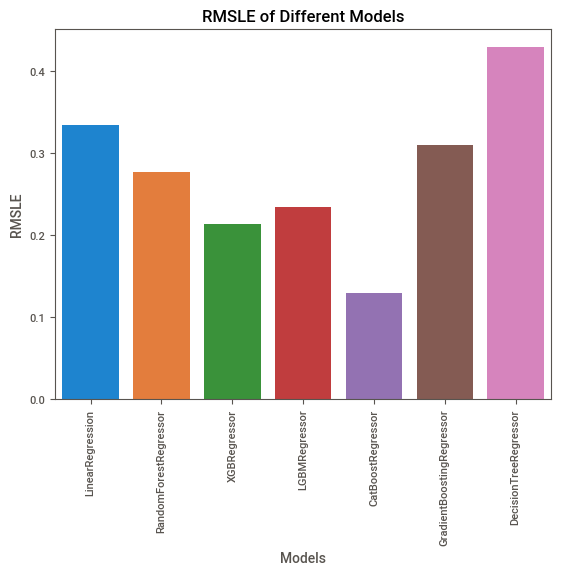

In [ ]:
# Create a list of model names
model_names = ['LinearRegression', 'RandomForestRegressor', 'XGBRegressor', 'LGBMRegressor', 'CatBoostRegressor', 'GradientBoostingRegressor', 'DecisionTreeRegressor']

# Create a list of RMSLE values
rmsle_values = [rmsle_lg, rmsle_RF, rmsle_xgb, rmsle_lgb, rmsle_cb, rmsle_gb, rmsle_dtm]

# Create a dictionary of model names and RMSLE values using the zip function
rmsle_dict = dict(zip(model_names, rmsle_values))

# Find the model with the least RMSLE value using the min function
best_model = min(rmsle_dict, key=rmsle_dict.get)

# Find the model with the biggest RMSLE value using the max function
worst_model = max(rmsle_dict, key=rmsle_dict.get)

sns.barplot(x=list(rmsle_dict.keys()), y=list(rmsle_dict.values()))
plt.xlabel("Models")
plt.ylabel("RMSLE")
plt.title("RMSLE of Different Models")
plt.xticks(rotation=90)
plt.show()


In [ ]:

print("Best Model: ", best_model)
print("RMSLE Value: ", rmsle_dict[best_model])
print("")
print("Worst Model: ", worst_model)
print("RMSLE Value: ", rmsle_dict[worst_model])

Best Model:  CatBoostRegressor
RMSLE Value:  0.1294499769822171

Worst Model:  DecisionTreeRegressor
RMSLE Value:  0.4287362859486855


# FEATURE IMPORTANCE 

In [ ]:
#
#from catboost import CatBoostRegressor
from catboost import CatBoostRegressor, Pool


# Convert the pandas DataFrame to a catboost.Pool object
train_pool = Pool(data=X_train, label=y_train)

# Fit a CatBoostRegressor model to the data
model = CatBoostRegressor(random_state=0)
model.fit(train_pool)

# Calculate the feature importances
feature_importances = model.get_feature_importance(train_pool, type='PredictionValuesChange')

# Sort the features by importance
sorted_idx = np.argsort(feature_importances)[::-1]


Learning rate set to 0.044112
0:	learn: 0.5720145	total: 2.28ms	remaining: 2.28s
1:	learn: 0.5685873	total: 3.31ms	remaining: 1.65s
2:	learn: 0.5604146	total: 5.65ms	remaining: 1.88s
3:	learn: 0.5533275	total: 7.89ms	remaining: 1.96s
4:	learn: 0.5498138	total: 9.92ms	remaining: 1.97s
5:	learn: 0.5413566	total: 11.9ms	remaining: 1.98s
6:	learn: 0.5348345	total: 14.5ms	remaining: 2.06s
7:	learn: 0.5312556	total: 16.9ms	remaining: 2.09s
8:	learn: 0.5246800	total: 18.7ms	remaining: 2.06s
9:	learn: 0.5183148	total: 21ms	remaining: 2.08s
10:	learn: 0.5133995	total: 23ms	remaining: 2.07s
11:	learn: 0.5107618	total: 25.2ms	remaining: 2.07s
12:	learn: 0.5088729	total: 26.4ms	remaining: 2s
13:	learn: 0.5036396	total: 29.2ms	remaining: 2.05s
14:	learn: 0.4971432	total: 32ms	remaining: 2.1s
15:	learn: 0.4921686	total: 34.8ms	remaining: 2.14s
16:	learn: 0.4862442	total: 37.2ms	remaining: 2.15s
17:	learn: 0.4819438	total: 39.8ms	remaining: 2.17s
18:	learn: 0.4778360	total: 42.2ms	remaining: 2.18s
19

197:	learn: 0.3022751	total: 391ms	remaining: 1.58s
198:	learn: 0.3022305	total: 394ms	remaining: 1.58s
199:	learn: 0.3010635	total: 396ms	remaining: 1.58s
200:	learn: 0.3009983	total: 398ms	remaining: 1.58s
201:	learn: 0.3004956	total: 401ms	remaining: 1.58s
202:	learn: 0.3003672	total: 403ms	remaining: 1.58s
203:	learn: 0.2994878	total: 405ms	remaining: 1.58s
204:	learn: 0.2984133	total: 408ms	remaining: 1.58s
205:	learn: 0.2978295	total: 410ms	remaining: 1.58s
206:	learn: 0.2976492	total: 412ms	remaining: 1.58s
207:	learn: 0.2967703	total: 415ms	remaining: 1.58s
208:	learn: 0.2962095	total: 417ms	remaining: 1.58s
209:	learn: 0.2956647	total: 420ms	remaining: 1.58s
210:	learn: 0.2956294	total: 422ms	remaining: 1.58s
211:	learn: 0.2955521	total: 424ms	remaining: 1.58s
212:	learn: 0.2951760	total: 426ms	remaining: 1.57s
213:	learn: 0.2941402	total: 429ms	remaining: 1.57s
214:	learn: 0.2937519	total: 431ms	remaining: 1.57s
215:	learn: 0.2935006	total: 434ms	remaining: 1.57s
216:	learn: 

416:	learn: 0.2236293	total: 1.01s	remaining: 1.41s
417:	learn: 0.2236062	total: 1.01s	remaining: 1.41s
418:	learn: 0.2234186	total: 1.01s	remaining: 1.4s
419:	learn: 0.2234053	total: 1.01s	remaining: 1.4s
420:	learn: 0.2233459	total: 1.02s	remaining: 1.4s
421:	learn: 0.2232029	total: 1.02s	remaining: 1.4s
422:	learn: 0.2230602	total: 1.02s	remaining: 1.4s
423:	learn: 0.2228103	total: 1.02s	remaining: 1.39s
424:	learn: 0.2223752	total: 1.03s	remaining: 1.39s
425:	learn: 0.2221683	total: 1.03s	remaining: 1.39s
426:	learn: 0.2220260	total: 1.03s	remaining: 1.39s
427:	learn: 0.2218520	total: 1.04s	remaining: 1.39s
428:	learn: 0.2216896	total: 1.04s	remaining: 1.38s
429:	learn: 0.2214421	total: 1.04s	remaining: 1.38s
430:	learn: 0.2211520	total: 1.05s	remaining: 1.38s
431:	learn: 0.2207595	total: 1.05s	remaining: 1.38s
432:	learn: 0.2206097	total: 1.05s	remaining: 1.38s
433:	learn: 0.2205552	total: 1.05s	remaining: 1.38s
434:	learn: 0.2203891	total: 1.06s	remaining: 1.37s
435:	learn: 0.220

621:	learn: 0.1855065	total: 1.61s	remaining: 982ms
622:	learn: 0.1853324	total: 1.62s	remaining: 980ms
623:	learn: 0.1852521	total: 1.62s	remaining: 977ms
624:	learn: 0.1851051	total: 1.62s	remaining: 975ms
625:	learn: 0.1850557	total: 1.63s	remaining: 972ms
626:	learn: 0.1849442	total: 1.63s	remaining: 970ms
627:	learn: 0.1849235	total: 1.63s	remaining: 968ms
628:	learn: 0.1845867	total: 1.64s	remaining: 965ms
629:	learn: 0.1844798	total: 1.64s	remaining: 963ms
630:	learn: 0.1843626	total: 1.64s	remaining: 961ms
631:	learn: 0.1843164	total: 1.65s	remaining: 958ms
632:	learn: 0.1843125	total: 1.65s	remaining: 956ms
633:	learn: 0.1841462	total: 1.65s	remaining: 953ms
634:	learn: 0.1840258	total: 1.65s	remaining: 951ms
635:	learn: 0.1840221	total: 1.66s	remaining: 948ms
636:	learn: 0.1839503	total: 1.66s	remaining: 946ms
637:	learn: 0.1836698	total: 1.66s	remaining: 943ms
638:	learn: 0.1833954	total: 1.67s	remaining: 941ms
639:	learn: 0.1833088	total: 1.67s	remaining: 938ms
640:	learn: 

839:	learn: 0.1583292	total: 2.21s	remaining: 421ms
840:	learn: 0.1582543	total: 2.21s	remaining: 418ms
841:	learn: 0.1581504	total: 2.22s	remaining: 416ms
842:	learn: 0.1579921	total: 2.22s	remaining: 413ms
843:	learn: 0.1578487	total: 2.22s	remaining: 411ms
844:	learn: 0.1577926	total: 2.22s	remaining: 408ms
845:	learn: 0.1576381	total: 2.23s	remaining: 405ms
846:	learn: 0.1575252	total: 2.23s	remaining: 403ms
847:	learn: 0.1574576	total: 2.23s	remaining: 400ms
848:	learn: 0.1573127	total: 2.23s	remaining: 398ms
849:	learn: 0.1572492	total: 2.24s	remaining: 395ms
850:	learn: 0.1571237	total: 2.24s	remaining: 392ms
851:	learn: 0.1570940	total: 2.24s	remaining: 390ms
852:	learn: 0.1569357	total: 2.25s	remaining: 387ms
853:	learn: 0.1568108	total: 2.25s	remaining: 385ms
854:	learn: 0.1566084	total: 2.25s	remaining: 382ms
855:	learn: 0.1565036	total: 2.26s	remaining: 380ms
856:	learn: 0.1564117	total: 2.26s	remaining: 377ms
857:	learn: 0.1562909	total: 2.26s	remaining: 375ms
858:	learn: 

In [ ]:
# Print the feature importances
for idx in sorted_idx:
    print("{}: {:.3f}".format(X_train.columns[idx], feature_importances[idx]))


weekday: 27.560
year: 23.866
id: 16.779
transactions: 13.525
dcoilwtico: 3.586
next_day_sales: 3.067
lag_1: 2.500
quarter: 2.294
month: 1.981
week: 1.438
Promotions_bin_1: 1.232
Holiday_type_Holiday: 0.705
Holiday_type_Event: 0.647
Promotions_bin_0: 0.367
Promotions_bin_3: 0.071
Holiday_type_Additional: 0.046
family_DELI: 0.044
Holiday_type_Transfer: 0.036
family_PLAYERS_AND_ELECTRONICS: 0.031
family_FROZEN_FOODS: 0.020
family_HOME_AND_KITCHEN_I: 0.019
Store_type_A: 0.018
Holiday_type_Bridge: 0.015
family_BEAUTY: 0.013
family_HOME_APPLIANCES: 0.012
family_HOME_AND_KITCHEN_II: 0.010
family_GROCERY_I: 0.009
family_HARDWARE: 0.009
Store_type_B: 0.009
family_LINGERIE: 0.009
store_nbr: 0.009
family_PREPARED_FOODS: 0.006
Promotions_bin_2: 0.006
family_PRODUCE: 0.006
family_LIQUOR_WINE_BEER: 0.005
family_SCHOOL_AND_OFFICE_SUPPLIES: 0.004
cluster: 0.004
deviation: 0.004
family_LAWN_AND_GARDEN: 0.003
family_POULTRY: 0.003
Store_type_D: 0.003
family_BREAD_BAKERY: 0.003
family_MAGAZINES: 0.003
fa

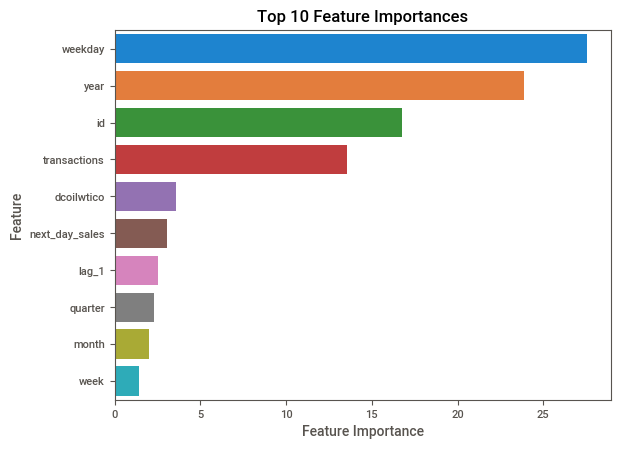

In [ ]:
# Plot the feature importances
sns.barplot(x=feature_importances[sorted_idx[:10]], y=X_train.columns[sorted_idx[:10]])

plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')

plt.show()

In [ ]:
from catboost import CatBoostRegressor, Pool

# Fit a CatBoostRegressor model to the data
model = CatBoostRegressor(random_state=0)
model.fit(X_train, y_train)

# Convert the pandas DataFrame to a catboost.Pool object
train_pool = Pool(data=X_train, label=y_train)

# Calculate the feature importances
feature_importances = model.get_feature_importance(train_pool, type='PredictionValuesChange')

# Set a threshold for the minimum importance to keep a feature
importance_threshold = 2

# Keep only the features with importance above the threshold
X_important = X_train.iloc[:, feature_importances > importance_threshold]

# Fit the CatBoostRegressor model to the important features only
model_important = CatBoostRegressor()
model_important.fit(X_important, y_train)

# Make predictions on the reduced feature set
y_pred = model_important.predict(X_important)


Learning rate set to 0.044112
0:	learn: 0.5720145	total: 2.23ms	remaining: 2.22s
1:	learn: 0.5685873	total: 3.38ms	remaining: 1.68s
2:	learn: 0.5604146	total: 5.6ms	remaining: 1.86s
3:	learn: 0.5533275	total: 7.78ms	remaining: 1.94s
4:	learn: 0.5498138	total: 10.1ms	remaining: 2.01s
5:	learn: 0.5413566	total: 12.2ms	remaining: 2.03s
6:	learn: 0.5348345	total: 14.8ms	remaining: 2.1s
7:	learn: 0.5312556	total: 16.9ms	remaining: 2.1s
8:	learn: 0.5246800	total: 19ms	remaining: 2.09s
9:	learn: 0.5183148	total: 21.2ms	remaining: 2.1s
10:	learn: 0.5133995	total: 23.4ms	remaining: 2.1s
11:	learn: 0.5107618	total: 25.9ms	remaining: 2.13s
12:	learn: 0.5088729	total: 27.3ms	remaining: 2.08s
13:	learn: 0.5036396	total: 30.3ms	remaining: 2.13s
14:	learn: 0.4971432	total: 33ms	remaining: 2.17s
15:	learn: 0.4921686	total: 35.8ms	remaining: 2.2s
16:	learn: 0.4862442	total: 38.7ms	remaining: 2.24s
17:	learn: 0.4819438	total: 40.9ms	remaining: 2.23s
18:	learn: 0.4778360	total: 43ms	remaining: 2.22s
19:	

186:	learn: 0.3122239	total: 388ms	remaining: 1.69s
187:	learn: 0.3106751	total: 391ms	remaining: 1.69s
188:	learn: 0.3103231	total: 394ms	remaining: 1.69s
189:	learn: 0.3085883	total: 397ms	remaining: 1.69s
190:	learn: 0.3075120	total: 399ms	remaining: 1.69s
191:	learn: 0.3066510	total: 402ms	remaining: 1.69s
192:	learn: 0.3055688	total: 406ms	remaining: 1.7s
193:	learn: 0.3048842	total: 408ms	remaining: 1.7s
194:	learn: 0.3038937	total: 411ms	remaining: 1.7s
195:	learn: 0.3035008	total: 414ms	remaining: 1.7s
196:	learn: 0.3031819	total: 418ms	remaining: 1.7s
197:	learn: 0.3022751	total: 421ms	remaining: 1.7s
198:	learn: 0.3022305	total: 423ms	remaining: 1.7s
199:	learn: 0.3010635	total: 426ms	remaining: 1.7s
200:	learn: 0.3009983	total: 429ms	remaining: 1.7s
201:	learn: 0.3004956	total: 431ms	remaining: 1.7s
202:	learn: 0.3003672	total: 435ms	remaining: 1.71s
203:	learn: 0.2994878	total: 438ms	remaining: 1.71s
204:	learn: 0.2984133	total: 440ms	remaining: 1.71s
205:	learn: 0.2978295	

364:	learn: 0.2341682	total: 999ms	remaining: 1.74s
365:	learn: 0.2339637	total: 1s	remaining: 1.74s
366:	learn: 0.2335665	total: 1.01s	remaining: 1.74s
367:	learn: 0.2333343	total: 1.01s	remaining: 1.73s
368:	learn: 0.2333014	total: 1.01s	remaining: 1.73s
369:	learn: 0.2329948	total: 1.02s	remaining: 1.73s
370:	learn: 0.2328626	total: 1.02s	remaining: 1.73s
371:	learn: 0.2326357	total: 1.02s	remaining: 1.73s
372:	learn: 0.2321324	total: 1.03s	remaining: 1.73s
373:	learn: 0.2321108	total: 1.03s	remaining: 1.73s
374:	learn: 0.2319603	total: 1.03s	remaining: 1.73s
375:	learn: 0.2316055	total: 1.04s	remaining: 1.72s
376:	learn: 0.2313119	total: 1.04s	remaining: 1.72s
377:	learn: 0.2312797	total: 1.04s	remaining: 1.72s
378:	learn: 0.2309523	total: 1.05s	remaining: 1.72s
379:	learn: 0.2309343	total: 1.05s	remaining: 1.72s
380:	learn: 0.2304593	total: 1.05s	remaining: 1.72s
381:	learn: 0.2301569	total: 1.06s	remaining: 1.71s
382:	learn: 0.2297195	total: 1.06s	remaining: 1.71s
383:	learn: 0.2

557:	learn: 0.1962045	total: 1.6s	remaining: 1.27s
558:	learn: 0.1959994	total: 1.6s	remaining: 1.26s
559:	learn: 0.1956279	total: 1.6s	remaining: 1.26s
560:	learn: 0.1955725	total: 1.61s	remaining: 1.26s
561:	learn: 0.1955617	total: 1.61s	remaining: 1.26s
562:	learn: 0.1955543	total: 1.61s	remaining: 1.25s
563:	learn: 0.1952919	total: 1.62s	remaining: 1.25s
564:	learn: 0.1952615	total: 1.62s	remaining: 1.25s
565:	learn: 0.1948768	total: 1.62s	remaining: 1.24s
566:	learn: 0.1948101	total: 1.63s	remaining: 1.24s
567:	learn: 0.1947818	total: 1.63s	remaining: 1.24s
568:	learn: 0.1946287	total: 1.63s	remaining: 1.24s
569:	learn: 0.1945162	total: 1.64s	remaining: 1.23s
570:	learn: 0.1942877	total: 1.64s	remaining: 1.23s
571:	learn: 0.1938596	total: 1.64s	remaining: 1.23s
572:	learn: 0.1935126	total: 1.65s	remaining: 1.23s
573:	learn: 0.1933546	total: 1.65s	remaining: 1.22s
574:	learn: 0.1932739	total: 1.65s	remaining: 1.22s
575:	learn: 0.1931371	total: 1.66s	remaining: 1.22s
576:	learn: 0.1

763:	learn: 0.1669696	total: 2.2s	remaining: 679ms
764:	learn: 0.1668200	total: 2.2s	remaining: 676ms
765:	learn: 0.1667746	total: 2.2s	remaining: 673ms
766:	learn: 0.1664977	total: 2.21s	remaining: 670ms
767:	learn: 0.1663360	total: 2.21s	remaining: 667ms
768:	learn: 0.1663299	total: 2.21s	remaining: 664ms
769:	learn: 0.1661232	total: 2.21s	remaining: 661ms
770:	learn: 0.1660101	total: 2.22s	remaining: 658ms
771:	learn: 0.1659298	total: 2.22s	remaining: 655ms
772:	learn: 0.1657590	total: 2.22s	remaining: 652ms
773:	learn: 0.1656211	total: 2.22s	remaining: 649ms
774:	learn: 0.1654555	total: 2.23s	remaining: 647ms
775:	learn: 0.1653767	total: 2.23s	remaining: 644ms
776:	learn: 0.1652808	total: 2.23s	remaining: 641ms
777:	learn: 0.1652043	total: 2.24s	remaining: 638ms
778:	learn: 0.1650904	total: 2.24s	remaining: 635ms
779:	learn: 0.1649497	total: 2.24s	remaining: 632ms
780:	learn: 0.1648159	total: 2.25s	remaining: 630ms
781:	learn: 0.1646850	total: 2.25s	remaining: 627ms
782:	learn: 0.1

955:	learn: 0.1448420	total: 2.76s	remaining: 127ms
956:	learn: 0.1447291	total: 2.77s	remaining: 124ms
957:	learn: 0.1446322	total: 2.77s	remaining: 121ms
958:	learn: 0.1445522	total: 2.77s	remaining: 118ms
959:	learn: 0.1443240	total: 2.77s	remaining: 116ms
960:	learn: 0.1442325	total: 2.78s	remaining: 113ms
961:	learn: 0.1441025	total: 2.78s	remaining: 110ms
962:	learn: 0.1440472	total: 2.78s	remaining: 107ms
963:	learn: 0.1439943	total: 2.79s	remaining: 104ms
964:	learn: 0.1439862	total: 2.79s	remaining: 101ms
965:	learn: 0.1438236	total: 2.79s	remaining: 98.3ms
966:	learn: 0.1437592	total: 2.8s	remaining: 95.4ms
967:	learn: 0.1436742	total: 2.8s	remaining: 92.5ms
968:	learn: 0.1435640	total: 2.8s	remaining: 89.7ms
969:	learn: 0.1435381	total: 2.81s	remaining: 86.8ms
970:	learn: 0.1434820	total: 2.81s	remaining: 83.9ms
971:	learn: 0.1433744	total: 2.81s	remaining: 81.1ms
972:	learn: 0.1432476	total: 2.82s	remaining: 78.1ms
973:	learn: 0.1431815	total: 2.82s	remaining: 75.3ms
974:	l

201:	learn: 0.2630925	total: 385ms	remaining: 1.52s
202:	learn: 0.2628414	total: 388ms	remaining: 1.52s
203:	learn: 0.2625785	total: 390ms	remaining: 1.52s
204:	learn: 0.2624314	total: 392ms	remaining: 1.52s
205:	learn: 0.2621671	total: 393ms	remaining: 1.52s
206:	learn: 0.2614723	total: 395ms	remaining: 1.51s
207:	learn: 0.2607446	total: 397ms	remaining: 1.51s
208:	learn: 0.2605959	total: 399ms	remaining: 1.51s
209:	learn: 0.2602891	total: 401ms	remaining: 1.51s
210:	learn: 0.2598945	total: 403ms	remaining: 1.51s
211:	learn: 0.2595523	total: 405ms	remaining: 1.51s
212:	learn: 0.2592005	total: 407ms	remaining: 1.5s
213:	learn: 0.2590588	total: 409ms	remaining: 1.5s
214:	learn: 0.2589119	total: 411ms	remaining: 1.5s
215:	learn: 0.2587477	total: 412ms	remaining: 1.5s
216:	learn: 0.2582881	total: 414ms	remaining: 1.49s
217:	learn: 0.2582051	total: 416ms	remaining: 1.49s
218:	learn: 0.2578085	total: 419ms	remaining: 1.49s
219:	learn: 0.2576686	total: 421ms	remaining: 1.49s
220:	learn: 0.25

400:	learn: 0.2122124	total: 776ms	remaining: 1.16s
401:	learn: 0.2120621	total: 779ms	remaining: 1.16s
402:	learn: 0.2118410	total: 780ms	remaining: 1.16s
403:	learn: 0.2117557	total: 782ms	remaining: 1.15s
404:	learn: 0.2116678	total: 784ms	remaining: 1.15s
405:	learn: 0.2115681	total: 786ms	remaining: 1.15s
406:	learn: 0.2113243	total: 788ms	remaining: 1.15s
407:	learn: 0.2111441	total: 790ms	remaining: 1.15s
408:	learn: 0.2109985	total: 791ms	remaining: 1.14s
409:	learn: 0.2109186	total: 793ms	remaining: 1.14s
410:	learn: 0.2106812	total: 795ms	remaining: 1.14s
411:	learn: 0.2106253	total: 797ms	remaining: 1.14s
412:	learn: 0.2102730	total: 799ms	remaining: 1.14s
413:	learn: 0.2100625	total: 801ms	remaining: 1.13s
414:	learn: 0.2098484	total: 803ms	remaining: 1.13s
415:	learn: 0.2096515	total: 805ms	remaining: 1.13s
416:	learn: 0.2095380	total: 807ms	remaining: 1.13s
417:	learn: 0.2094883	total: 809ms	remaining: 1.13s
418:	learn: 0.2091210	total: 811ms	remaining: 1.12s
419:	learn: 

589:	learn: 0.1803769	total: 1.14s	remaining: 793ms
590:	learn: 0.1803648	total: 1.14s	remaining: 792ms
591:	learn: 0.1801952	total: 1.15s	remaining: 790ms
592:	learn: 0.1800990	total: 1.15s	remaining: 788ms
593:	learn: 0.1800312	total: 1.15s	remaining: 786ms
594:	learn: 0.1799371	total: 1.15s	remaining: 784ms
595:	learn: 0.1797737	total: 1.15s	remaining: 782ms
596:	learn: 0.1796444	total: 1.15s	remaining: 780ms
597:	learn: 0.1795058	total: 1.16s	remaining: 778ms
598:	learn: 0.1794136	total: 1.16s	remaining: 776ms
599:	learn: 0.1790261	total: 1.16s	remaining: 775ms
600:	learn: 0.1787613	total: 1.16s	remaining: 773ms
601:	learn: 0.1785347	total: 1.17s	remaining: 771ms
602:	learn: 0.1783487	total: 1.17s	remaining: 769ms
603:	learn: 0.1782578	total: 1.17s	remaining: 767ms
604:	learn: 0.1781001	total: 1.17s	remaining: 765ms
605:	learn: 0.1780412	total: 1.17s	remaining: 764ms
606:	learn: 0.1775899	total: 1.18s	remaining: 762ms
607:	learn: 0.1773717	total: 1.18s	remaining: 760ms
608:	learn: 

780:	learn: 0.1556513	total: 1.53s	remaining: 429ms
781:	learn: 0.1555497	total: 1.53s	remaining: 427ms
782:	learn: 0.1554826	total: 1.53s	remaining: 425ms
783:	learn: 0.1553716	total: 1.54s	remaining: 423ms
784:	learn: 0.1553288	total: 1.54s	remaining: 422ms
785:	learn: 0.1551540	total: 1.54s	remaining: 420ms
786:	learn: 0.1550508	total: 1.54s	remaining: 418ms
787:	learn: 0.1550102	total: 1.55s	remaining: 416ms
788:	learn: 0.1548743	total: 1.55s	remaining: 414ms
789:	learn: 0.1547954	total: 1.55s	remaining: 412ms
790:	learn: 0.1547183	total: 1.55s	remaining: 410ms
791:	learn: 0.1546475	total: 1.55s	remaining: 408ms
792:	learn: 0.1546393	total: 1.55s	remaining: 406ms
793:	learn: 0.1545456	total: 1.56s	remaining: 405ms
794:	learn: 0.1543970	total: 1.56s	remaining: 403ms
795:	learn: 0.1542652	total: 1.56s	remaining: 401ms
796:	learn: 0.1540570	total: 1.56s	remaining: 399ms
797:	learn: 0.1540293	total: 1.57s	remaining: 397ms
798:	learn: 0.1539404	total: 1.57s	remaining: 395ms
799:	learn: 

950:	learn: 0.1394049	total: 1.88s	remaining: 96.8ms
951:	learn: 0.1393655	total: 1.88s	remaining: 94.9ms
952:	learn: 0.1392593	total: 1.88s	remaining: 92.9ms
953:	learn: 0.1391848	total: 1.89s	remaining: 90.9ms
954:	learn: 0.1391252	total: 1.89s	remaining: 89ms
955:	learn: 0.1390590	total: 1.89s	remaining: 87ms
956:	learn: 0.1389514	total: 1.89s	remaining: 85ms
957:	learn: 0.1388431	total: 1.89s	remaining: 83ms
958:	learn: 0.1387080	total: 1.9s	remaining: 81ms
959:	learn: 0.1386390	total: 1.9s	remaining: 79.1ms
960:	learn: 0.1384449	total: 1.9s	remaining: 77.1ms
961:	learn: 0.1382583	total: 1.9s	remaining: 75.1ms
962:	learn: 0.1381133	total: 1.9s	remaining: 73.2ms
963:	learn: 0.1380282	total: 1.91s	remaining: 71.2ms
964:	learn: 0.1379569	total: 1.91s	remaining: 69.2ms
965:	learn: 0.1378610	total: 1.91s	remaining: 67.2ms
966:	learn: 0.1378255	total: 1.91s	remaining: 65.3ms
967:	learn: 0.1377651	total: 1.91s	remaining: 63.3ms
968:	learn: 0.1375544	total: 1.92s	remaining: 61.3ms
969:	lea

In [ ]:
# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_train, y_pred)
print("MSE: {:.3f}".format(mse))

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("RMSE: {:.3f}".format(rmse))

# Calculate the root mean squared logarithmic error (RMSLE)
rmsle_xgb_2 = np.sqrt(np.mean((np.log(y_pred + 1) - np.log(y_train + 1))**2))
print("RMSLE: {:.3f}".format(rmsle_xgb_2))

MSE: 0.018
RMSE: 0.135
RMSLE: 0.081


In [ ]:
# Make predictions on the validation set
y_val_pred = model_important.predict(X_validation_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_validation_test, y_val_pred)
print("MSE: {:.3f}".format(mse))

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("RMSE: {:.3f}".format(rmse))

# Calculate the root mean squared logarithmic error (RMSLE)
rmsle_xgb_3 = np.sqrt(mean_squared_log_error(y_validation_test, y_val_pred))
print("RMSLE: {:.3f}".format(rmsle_xgb_3))


MSE: 0.073
RMSE: 0.270
RMSLE: 0.132


In [ ]:
pip install shap

In [ ]:
from sklearn.inspection import permutation_importance

# Fit the Random Forest Regressor on the training data
reg = RandomForestRegressor(random_state=0)
reg.fit(X_train, y_train)

# Calculate the permutation importance for each feature
result = permutation_importance(reg, X_validation_test, y_validation_test, n_repeats=10, random_state=0)

# Create a DataFrame to store the feature names and their corresponding permutation importance score
feature_importance = pd.DataFrame({'feature': X_validation_test.columns,
                                   'permutation_importance': result.importances.mean(axis=1)})

# Sort the DataFrame by permutation importance in descending order
feature_importance.sort_values(by='permutation_importance', ascending=False, inplace=True)

# Print the top 10 most important features
print(feature_importance.head(10))


                   feature  permutation_importance
9                  weekday                0.725630
3             transactions                0.201105
55        Promotions_bin_1                0.047210
54        Promotions_bin_0                0.046616
52   Holiday_type_Transfer                0.011098
4               dcoilwtico                0.002323
51    Holiday_type_Holiday                0.001515
57        Promotions_bin_3                0.000534
7                  quarter                0.000108
32  family_HOME_APPLIANCES                0.000089


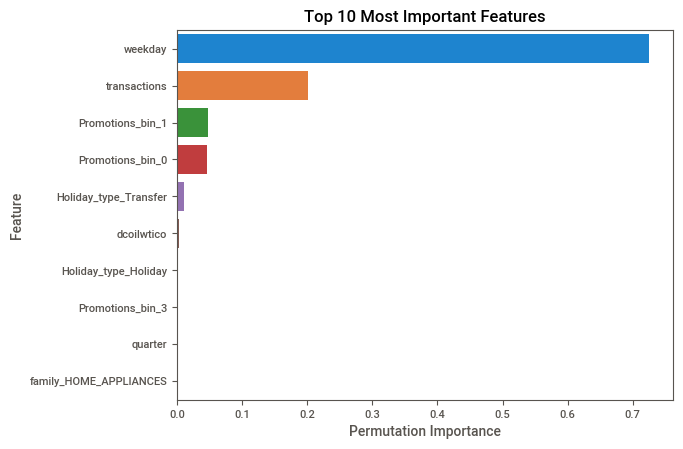

In [ ]:
sns.barplot(x='permutation_importance', y='feature', data=feature_importance.head(10))
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()

In [ ]:
# Select the top n features
n = 10 # number of top features
X_important = X_train[feature_importance['feature'].head(n)]

# Train the RandomForestRegressor on the selected features
reg_important = RandomForestRegressor(random_state=0)
reg_important.fit(X_important, y_train)

# Make predictions on the validation set using the new model
y_pred = reg_important.predict(X_validation_test[feature_importance['feature'].head(n)])




In [ ]:
# Calculate the RMSLE
rmsle_RF_opt = np.sqrt(mean_squared_log_error(y_validation_test, y_pred))
print("RMSLE: {:.3f}".format(rmsle_RF_opt))

RMSLE: 0.210


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter space to search
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [None, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 2, 5, 10]}

# Create the GridSearchCV object
reg_important_cv = GridSearchCV(reg_important, param_grid, cv=5)

#Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(reg_important, param_grid, scoring='neg_mean_squared_log_error', cv=5)
grid_search.fit(X_important, y_train)

#Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

#Make predictions on the validation set using the best model
y_pred = grid_search.predict(X_validation_test[feature_importance['feature'].head(n)])

#Calculate the RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_validation_test, y_pred))
print("RMSLE: ", rmsle)

Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 500}
RMSLE:  0.2391266321123765


# Model Interpretability

#### Using shapely Values for the feature importance 

In [ ]:
import shap

# Need to load JS vis in the notebook
shap.initjs()

In [ ]:
from xgboost import XGBRegressor

# instantiate the regressor
xgc = XGBRegressor(random_state=0)

# fit the XGBoost regressor
xgc.fit(X_train, y_train)

# create the explainer
explainer = shap.Explainer(xgc.predict, X_train)

# calculate the SHAP values for the validation test data
shap_values = explainer(X_validation_test)

# get the expected value
expected_value = xgc.predict(X_train).mean()
print('Expected Value:', expected_value)


Permutation explainer: 86it [00:22,  1.90it/s]                        

Expected Value: 0.8033739


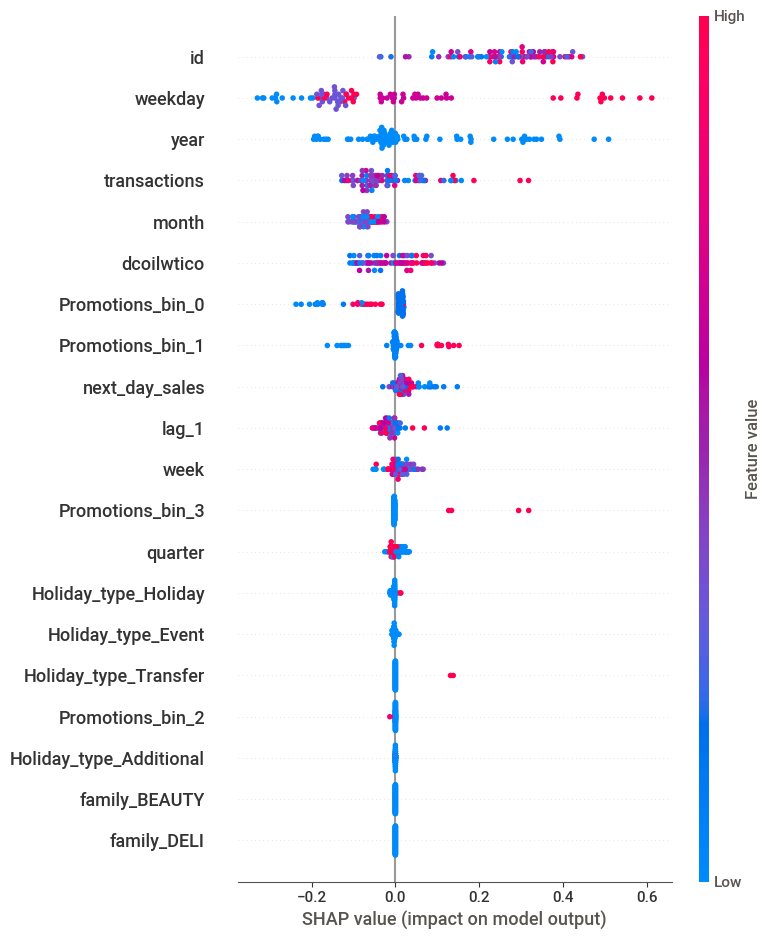

In [ ]:
#Global Interpretaion

shap.summary_plot(shap_values, X_validation_test)

In [ ]:
# Select the top n features
n = 10 # number of top features
X_important = X_train.iloc[:, np.argsort(np.abs(shap_values.values).mean(0))[-n:]]

xgc_important = XGBRegressor(random_state=0)
xgc_important.fit(X_important, y_train)

y_val_pred = xgc_important.predict(X_validation_test.loc[:, X_important.columns])

#rmsle_XGB_O = np.sqrt(mean_squared_log_error(y_validation_test, y_val_pred))
#print("RMSLE: ", rmsle_XGB_O)


# Calculate the root mean squared logarithmic error (RMSLE)
rmsle_XGB_O = np.sqrt(np.mean((np.log(y_val_pred + 1) - np.log(y_validation_test + 1))**2))
print("RMSLE: {:.3f}".format(rmsle_XGB_O))


RMSLE: 0.230


In [ ]:
# Use XGBRegressor to obtain the feature importance scores
xgb = XGBRegressor(random_state=0)
xgb.fit(X_train, y_train)

# Get the feature importance scores
importance = xgb.get_booster().get_score(importance_type='weight')

# Convert the feature importance scores to a DataFrame and sort by score in descending order
importance_df = pd.DataFrame(list(importance.items()), columns=['feature', 'score'])
importance_df.sort_values(by='score', ascending=False, inplace=True)

# Select the top n features
n = 10 # specify the number of top features
top_features = importance_df['feature'].head(n)

# Train XGBRegressor on the top n features
xgb_top_features = XGBRegressor(random_state=0)
xgb_top_features.fit(X_train[top_features], y_train)

# Predict using the model trained on top n features
y_pred = xgb_top_features.predict(X_validation_test[top_features])

# Calculate the RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_validation_test, y_pred))
print("RMSLE: ", rmsle)


RMSLE:  0.21078195289334953


In [ ]:
# Code here

In [ ]:
import joblib

In [ ]:
#Save the model to disk
filename = 'cb_model.joblib'
joblib.dump(model, filename)

['cb_model.joblib']

In [ ]:
if type(model) == cb.CatBoostRegressor:
    joblib.dump(model, filename)
    print("CatBoostRegressor model saved successfully.")
else:
    print("Error: Invalid model type.")


CatBoostRegressor model saved successfully.
